   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Amount     Date   
0     300  1/1/2022  
1     200  1/2/2022  
2     400  1/3/2022  
3     100  1/4/2022  
4      50  1/5/2022  

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Amount                    0
Date                      0
dtype: int64
            Frequency  Amount  Recency
CustomerID                            
1                   1     300        0
2                   1     200        0
3                   1     400 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

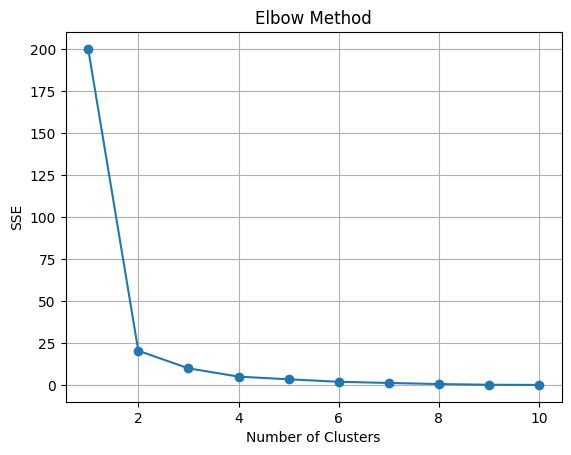

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.8200167242095208


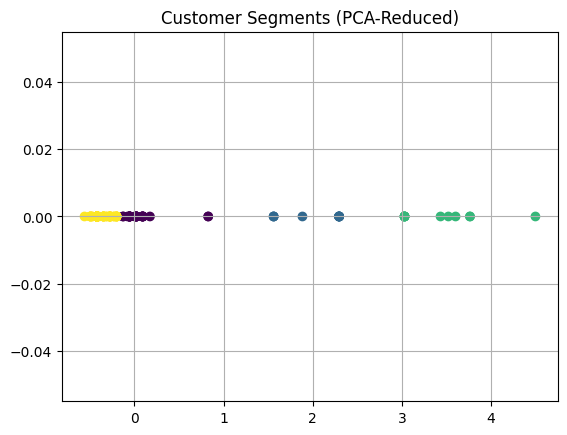

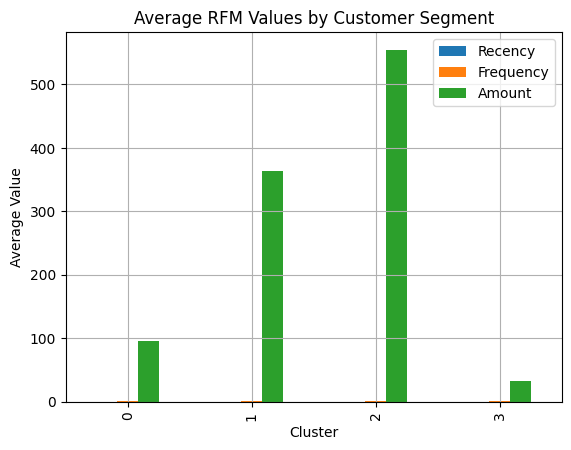

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load and preview data
def load_data(file_path):
    df = pd.read_csv('/content/Mall_Customers.csv')
    print(df.head())
    print("\nMissing values per column:")
    print(df.isnull().sum())
    return df

# Clean and preprocess data
def clean_data(df):
    df.fillna(0, inplace=True)
    if 'Date' in df.columns:
        print(df['Date'].dtype)
        print(df['Date'].unique())
    return df

# Create RFM features
def create_rfm(df):
    rfm = df.groupby('CustomerID').agg({
        'CustomerID': 'count',
        'Amount': 'sum'
    }).rename(columns={'CustomerID': 'Frequency'})
    rfm['Recency'] = 0
    print(rfm.head())
    return rfm

# Normalize RFM features
def normalize_rfm(rfm):
    scaler = StandardScaler()
    return scaler.fit_transform(rfm)

# Elbow method for optimal clusters
def plot_elbow_method(rfm_normalized):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(rfm_normalized)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()

# Apply K-means clustering
def apply_kmeans(rfm_normalized, rfm, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)
    sil_score = silhouette_score(rfm_normalized, rfm['Cluster'])
    print(f'Silhouette Score: {sil_score}')
    return rfm

# Visualize clusters using PCA
def visualize_pca_clusters(rfm, rfm_normalized):
    pca = PCA(n_components=2)
    rfm_pca = pca.fit_transform(rfm_normalized)
    plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
    plt.title('Customer Segments (PCA-Reduced)')
    plt.grid(True)
    plt.show()

# Visualize cluster characteristics
def visualize_cluster_characteristics(rfm):
    cluster_summary = rfm.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Amount': 'mean'   #Monetary
    }).reset_index()
    cluster_summary.plot(kind='bar', x='Cluster', stacked=False)
    plt.title('Average RFM Values by Customer Segment')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.show()

# Main function
def main():
    df = load_data('/content/Mall_Customers.csv')
    df_clean = clean_data(df)
    rfm = create_rfm(df_clean)
    rfm_normalized = normalize_rfm(rfm)
    plot_elbow_method(rfm_normalized)
    rfm_clustered = apply_kmeans(rfm_normalized, rfm, k=4)
    visualize_pca_clusters(rfm_clustered, rfm_normalized)
    visualize_cluster_characteristics(rfm_clustered)

# Execute the script
if __name__ == "__main__":
    main()

